# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Lending Club Project


**Harvard University**<br/>
**Fall 2018**<br/>

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler
import time

import math
from scipy.special import gamma

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns
sns.set()
import matplotlib.style
matplotlib.style.use('seaborn-whitegrid')
sns.set_style("white")
from IPython.display import display

<hr style="height:2pt">

<div class='theme'> Overview </div>

### This notebook contains the following sections:
* **Part 1**: Cleaning up some data
* **Part 2**: Reducing number of predictors
* **Part 3**: Exploring the data


<div class='exercise'><b> Part 1: Cleaning up some data </b></div>


This notebook uses the cleaned CSV data file downloaded from https://s3.amazonaws.com/109a/data_cleaned_df.csv. <br><br>
We're going to remove some rows that still show NaN values. This will otherwise interfere with fitting some models later.

In [3]:
# increase some display options to display all columns and more rows.
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 150

In [4]:
# read in the data set
df = pd.read_csv('../data/data_cleaned_df.csv', low_memory = False)

In [5]:
display(df.shape)
df.head()

(1065253, 107)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_reason,debt_settlement_flag
0,3600.0,3600.0,3600.0,0.0,7.49,111.97,A,A4,10.0,MORTGAGE,120000.0,Not Verified,2017-03-01,Fully Paid,Other,467xx,IN,18.90,0.0,1992-08-01,1.0,0,1,18.0,1.0,5658.0,14.9,33.0,1.0,0.0,0.0,3765.098751,3765.10,3600.0,165.10,0.0,0.00,0.000,2984.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36506.0,2.0,6.0,2.0,6.0,1.0,30848.0,4.0,7.0,1020.0,39.0,37900.0,3.0,1.0,4.0,13.0,2147.0,0.0,0.0,1.0,295.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,3.0,17.0,12.0,16.0,4.0,18.0,0.0,0.0,6.0,100.0,1.0,0.0,93599.0,36506.0,9000.0,55699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,5000.0,5000.0,5000.0,0.0,14.99,173.31,C,C4,10.0,RENT,68000.0,Not Verified,2017-03-01,Fully Paid,Debt consolidation,945xx,CA,22.50,0.0,2003-04-01,0.0,1,0,6.0,0.0,10276.0,90.1,18.0,0.0,0.0,0.0,5168.906377,5168.91,5000.0,168.91,0.0,0.00,0.000,5003.93,0.0,0.0,0.0,0.0,0.0,0.0,531.0,36168.0,0.0,2.0,0.0,2.0,1.0,25892.0,0.0,0.0,4261.0,69.0,11400.0,1.0,1.0,0.0,2.0,6028.0,0.0,0.0,1.0,111.0,46.0,18.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,4.0,6.0,8.0,4.0,9.0,4.0,6.0,0.0,0.0,0.0,94.4,0.0,0.0,52113.0,36168.0,11400.0,40713.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,10150.0,10150.0,10150.0,0.0,7.24,314.52,A,A3,8.0,MORTGAGE,50000.0,Not Verified,2017-03-01,Fully Paid,Debt consolidation,773xx,TX,29.60,0.0,2002-06-01,1.0,0,0,9.0,0.0,21845.0,56.0,21.0,1.0,0.0,0.0,10941.319984,10941.32,10150.0,791.32,0.0,0.00,0.000,6231.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239260.0,1.0,3.0,1.0,1.0,1.0,23502.0,0.0,0.0,11270.0,49.0,39000.0,1.0,1.0,2.0,2.0,29908.0,0.0,0.0,1.0,177.0,48.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,3.0,5.0,8.0,5.0,10.0,4.0,9.0,0.0,0.0,2.0,100.0,0.0,0.0,289751.0,45347.0,33400.0,54374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,14000.0,14000.0,14000.0,1.0,15.99,340.38,C,C5,10.0,RENT,43000.0,Source Verified,2017-03-01,Charged Off,Debt consolidation,367xx,AL,21.80,1.0,1995-10-01,0.0,1,0,3.0,0.0,18537.0,99.1,8.0,1.0,0.0,0.0,4804.100000,4804.10,1460.6,1577.95,0.0,1765.55,317.799,340.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26572.0,0.0,1.0,0.0,0.0,1.0,8035.0,0.0,0.0,18537.0,70.0,18700.0,0.0,0.0,0.0,0.0,8857.0,0.0,0.0,1.0,137.0,60.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,87.5,0.0,0.0,38058.0,26572.0,18700.0,19358.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,9000.0,9000.0,9000.0,0.0,11.39,296.32,B,B3,10.0,MORTGAGE,6000

In [6]:
# show all predictors that still have at least one NaN
def show_NaN(df):
    check_isna = df.isna().sum()
    for i in zip(check_isna.index, check_isna.values):
        if i[1] != 0:
            print(i)

In [7]:
show_NaN(df)

('title', 12703)
('inq_last_6mths', 1)
('total_pymnt_inv', 1)
('total_rec_prncp', 1)
('total_rec_int', 1)
('total_rec_late_fee', 1)
('recoveries', 1)
('collection_recovery_fee', 1)
('last_pymnt_amnt', 1)
('collections_12_mths_ex_med', 1)
('mths_since_last_major_derog', 1)
('application_type', 1)
('annual_inc_joint', 1)
('dti_joint', 1)
('acc_now_delinq', 1)
('tot_coll_amt', 2)
('tot_cur_bal', 2)
('open_acc_6m', 698949)
('open_act_il', 698948)
('open_il_12m', 698948)
('open_il_24m', 698948)
('mths_since_rcnt_il', 1)
('total_bal_il', 698948)
('open_rv_12m', 698948)
('open_rv_24m', 698948)
('max_bal_bc', 698948)
('all_util', 698979)
('total_rev_hi_lim', 2)
('inq_fi', 698948)
('total_cu_tl', 698949)
('inq_last_12m', 698949)
('acc_open_past_24mths', 1)
('avg_cur_bal', 18)
('chargeoff_within_12_mths', 1)
('delinq_amnt', 1)
('mo_sin_old_il_acct', 1)
('mo_sin_old_rev_tl_op', 2)
('mo_sin_rcnt_rev_tl_op', 2)
('mo_sin_rcnt_tl', 2)
('mort_acc', 1)
('mths_since_recent_bc', 1)
('mths_since_recent_bc

In [8]:
df[df['num_rev_accts'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_reason,debt_settlement_flag
407707,4800.0,4800.0,4800.0,0.0,13.99,164.03,C,C4,8.0,MORTGAGE,41600.0,Source Verified,2015-10-01,Fully Paid,Debt consolidation,128xx,NY,16.04,1.0,1997-11-01,1.0,1,1,4.0,1.0,2481.0,62.0,10.0,0.0,0.0,0.0,5425.100000,5425.10,4800.0,625.10,0.0,0.0,0.0,3464.20,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20862.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4000.0,NaN,NaN,NaN,1.0,5216.0,0.0,0.0,1.0,215.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,4.0,0.0,0.0,1.0,80.0,1.0,0.0,33714.0,20862.0,4000.0,29714.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1049426,11500.0,11500.0,11500.0,0.0,21.98,439.08,E,E4,6.0,RENT,48000.0,Verified,2012-12-01,Fully Paid,Debt Consolidation Carryover and Car,950xx,CA,11.95,0.0,2007-06-01,2.0,0,0,5.0,0.0,4014.0,80.3,14.0,0.0,0.0,0.0,11711.353688,11711.35,11500.0,211.35,0.0,0.0,0.0,11712.04,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,10795.0,4500.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1065252,8000.0,8000.0,8000.0,0.0,14.09,273.78,B,B5,0.5,MORTGAGE,165000.0,Source Verified,2012-10-01,Fully Paid,Debt Consolidation Opp,019xx,MA,11.59,0.0,1997-01-01,3.0,0,0,14.0,0.0,8210.0,42.5,21.0,0.0,0.0,0.0,9855.673000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# remove some rows with NaN
df = df.drop(index=[407707, 1049426, 1065252])

In [10]:
show_NaN(df)

('title', 12703)
('inq_last_6mths', 1)
('open_acc_6m', 698946)
('open_act_il', 698945)
('open_il_12m', 698945)
('open_il_24m', 698945)
('total_bal_il', 698945)
('open_rv_12m', 698945)
('open_rv_24m', 698945)
('max_bal_bc', 698945)
('all_util', 698976)
('inq_fi', 698945)
('total_cu_tl', 698946)
('inq_last_12m', 698946)
('avg_cur_bal', 16)
('pct_tl_nvr_dlq', 152)
('hardship_reason', 1061331)


<font color=red>Ask team how to best treat above NaN predictors.</font>

<div class='exercise'><b> Part 2: Reducing number of predictors </b></div>


In [11]:
def make_scatterplot(x, y):
    fig = plt.figure(figsize=(8,6))
    plt.scatter(x, y, alpha=0.8)
    plt.title('Compare two variables', fontsize=16)
    plt.xlabel(x.name, fontsize=14)
    plt.ylabel(y.name, fontsize=14)
    plt.legend(loc='best')
    plt.show()

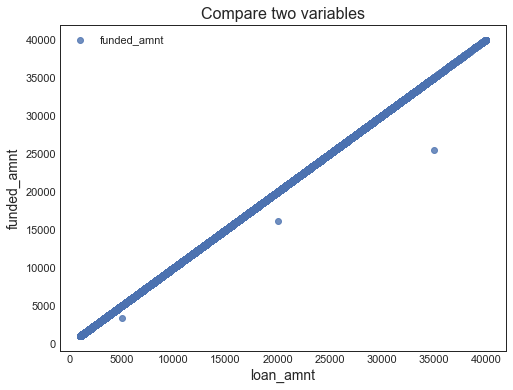

None

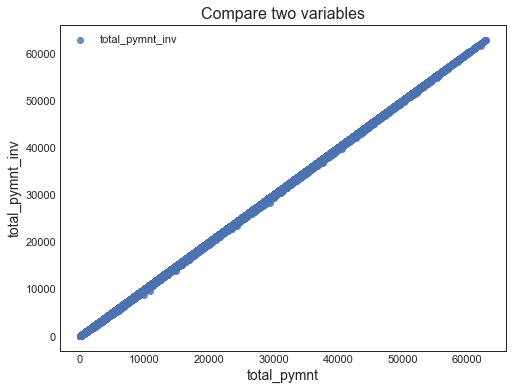

None

In [13]:
# When comparing predictors we can see that some of them are highly correlated, those should be removed from the data.
display(make_scatterplot(df['loan_amnt'], df['funded_amnt'])) # same for funded_amnt_inv
display(make_scatterplot(df['total_pymnt'], df['total_pymnt_inv']))

Based on the above analysis we can probably also remove the following columns:

In [14]:
cols_to_remove = ['funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv']

In [15]:
df = df.drop(columns=cols_to_remove)
df.shape

(1065250, 104)

<font color=red>Since sns.pairplot() runs forever with 100 predictors. The loop below compares one variable to all others but doesn't finish due to NaN in the data. What other ways are there to do this more efficiently?</font>

In [ ]:
#for col in sample_df:
#    display(make_scatterplot(sample_df['loan_status'], sample_df[col]))

<div class='exercise'><b> Part 3: Exploring the data </b></div>


In [16]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065250 entries, 0 to 1065251
Columns: 104 entries, loan_amnt to debt_settlement_flag
dtypes: float64(91), int64(2), object(11)
memory usage: 1.4 GB


The original df is so big that we would want to sample maybe 10% of it but at the same time making sure we keep the proportions from "loan_status"

In [17]:
gr = df["loan_status"].value_counts().to_frame()
gr

,loan_status
Fully Paid,845177
Charged Off,220073


Let's define ratios for splitting sample to make sure we get a similar distribution of fully paid and charged off observations.<br>
<font color=red>Not sure if there's an easier way to do this but this works.</font>

In [18]:
fp = gr.iloc[0,0] / len(df)
co = gr.iloc[1,0] / len(df)

# select 10% of the original df
fractions = {'Fully Paid': fp/10, 'Charged Off': co/10}
sample_df = pd.concat(df.sample(n=int(fractions.get(i) * len(df))) for i,dff in df.groupby('loan_status'))
grp = sample_df["loan_status"].value_counts().to_frame()
grp

,loan_status
Fully Paid,84319
Charged Off,22205


In [19]:
sample_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,106524.0,14489.648577,8630.405341,1000.00,8000.000000,12000.000000,20000.00000,4.000000e+04
term,106524.0,0.241504,0.427997,0.00,0.000000,0.000000,0.00000,1.000000e+00
int_rate,106524.0,13.350518,4.766114,5.32,9.800000,12.990000,16.20000,3.099000e+01
installment,106524.0,441.208467,259.593539,25.81,252.312500,378.200000,583.50250,1.714540e+03
emp_length,106524.0,5.720251,3.786656,0.00,2.000000,6.000000,10.00000,1.000000e+01
annual_inc,106524.0,76047.987724,56088.987810,0.00,46000.000000,65000.000000,90604.00000,5.000000e+06
dti,106524.0,18.404936,10.070920,0.00,11.990000,17.830000,24.29000,9.990000e+02
delinq_2yrs,106524.0,0.324209,0.891645,0.00,0.000000,0.000000,0.00000,2.100000e+01
inq_last_6mths,106524.0,0.663146,0.944483,0.00,0.000000,0.000000,1.00000,6.000000e+00
mths_since_last_delinq,106524.0,0.505013,0.499977,0.00,0.000000,1.000000,1.00000,1.000000e+00


<font color=red>We may be able to use PCA or forward/backward selection to reduce the number of columns but for that we would have to fit models. The function "step_forwards_backwards" below fails due to NaN in the data.</font>

In [20]:
data_train, data_test = train_test_split(sample_df, test_size=.2, stratify=sample_df['loan_status'], random_state=42)

In [21]:
X_train = sm.add_constant(data_train.drop('loan_status', axis=1))
X_test = sm.add_constant(data_test.drop('loan_status', axis=1))
y_train = data_train['loan_status'].values.reshape(-1,1)
y_test = data_test['loan_status'].values.reshape(-1,1)

Using the HW3 solution code for forward selection of predictors to narrow down the many predictors we currently have. This is using OLS and Bic to decide which predictors to keep. However, for this to work, there can't be any NaN in the data.

In [22]:
def step_forwards_backwards(df, y, direction='forward'):
    
    assert direction in ['forward', 'backward']

    predictors = set(df.columns)
    selected_predictors = set() if direction=='forward' else set(predictors)
    
    n = df.shape[0]
    best_bic = np.inf
    
    best_bics = []
    best_models = []
    
    if direction == 'forward':
        X = np.ones(n).reshape(-1,1)
        X = np.concatenate([X, df[list(selected_predictors)].values], axis=1)
        while (True):
            
            possible_bic_scores = []
            possible_predictors = list(selected_predictors ^ predictors)
            
            if len(possible_predictors) == 0:
                break
                
            for predictor in possible_predictors:
                
                x_temp = np.concatenate([X, df[predictor].values.reshape(-1,1)], axis=1)
                model = OLS(endog=y, exog=x_temp).fit()
                bic = model.bic
                possible_bic_scores.append(bic)
                
            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix]
            
            best_bic = np.min(possible_bic_scores)
            best_bics.append(best_bic)
            
            selected_predictors.add(best_predictor)            
            X = np.concatenate([X, df[best_predictor].values.reshape(-1,1)], axis=1)
            best_models.append(list(selected_predictors))

    else:

        while (True):
            possible_bic_scores = []
            possible_predictors = list(selected_predictors)

            if len(possible_predictors) == 0:
                break

            for predictor in possible_predictors:
                X = np.concatenate([np.ones(n).reshape(-1,1), 
                                    df[list(selected_predictors - set([predictor]))].values], axis=1)
                model = OLS(endog=y, exog=X).fit()
                bic = model.bic
                possible_bic_scores.append(bic)

            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix] 

            best_bic = possible_bic_scores[best_predictor_ix]
            selected_predictors.discard(best_predictor)
            
            best_bics.append(best_bic)
            best_models.append(list(selected_predictors))
            
    index_of_best_bic = np.argmin(best_bics)

    return best_models[index_of_best_bic]

In [ ]:
#predictors_forward = step_forwards_backwards(X_train, y_train, direction='forward')